## HELP International Clustering Assignment

### Problem statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Import all neccessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# K means clustering libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchial Clustering libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# To view large output

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)



### Data Understanding

In [2]:
# Read dataset

country_df= pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# checking for datatypes
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# checking the shape of the data frame

country_df.shape

(167, 10)

In [5]:
# checking for statistical summary of the dataframe

country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# checking for missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:

country_df.shape

(167, 10)

### Data Quality check

1. From imports ,exports, health columns : the values given are in percentage of gdpp.
2. lets convert the three columns percenatge values to its absolute values.

In [8]:
# Converting imports, exports, health from percentage value to Absolute values.

country_df['imports']= country_df['imports']* country_df['gdpp']/100
country_df['exports']= country_df['exports']* country_df['gdpp']/100
country_df['health']= country_df['health']* country_df['gdpp']/100

country_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
country_df.shape

(167, 10)

###  EDA :Univariate and Bivariate Analysis

In [10]:
# checking the columns available in the data frame
column= list(country_df.columns)
column

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [11]:
# remove the country column to analyse the numeric data distribution.
column= ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

In [12]:
column

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

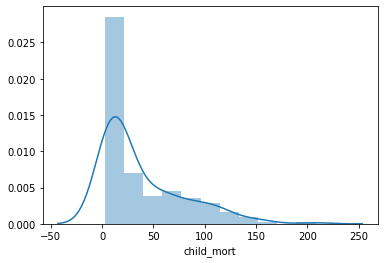

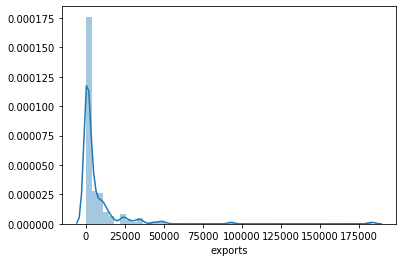

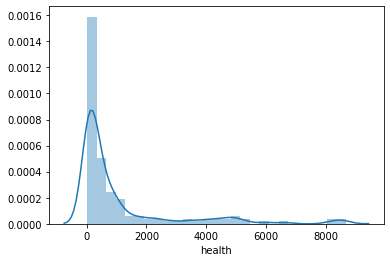

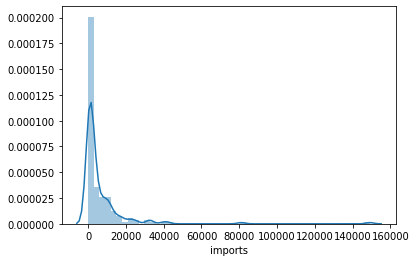

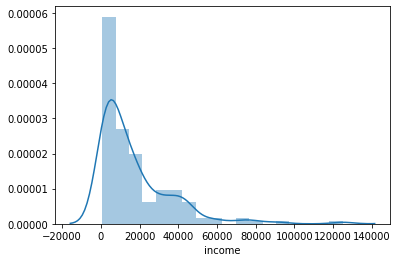

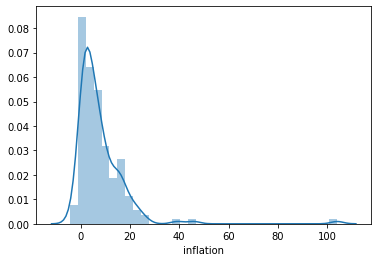

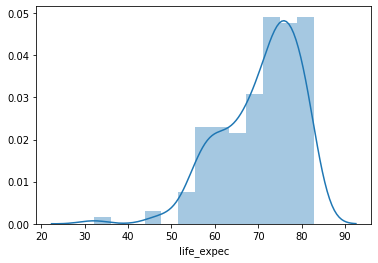

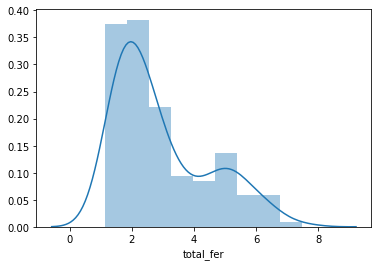

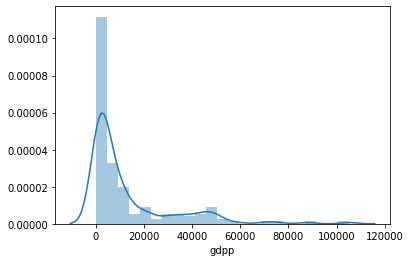

In [13]:
# checking how the data is distributed.

for c in column:
    sns.distplot(country_df[c])
    plt.show();

### Insights:

1.Cluster profiling will be done using gdpp, income, child mort.

In [14]:
# Check for correlation values
country_df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


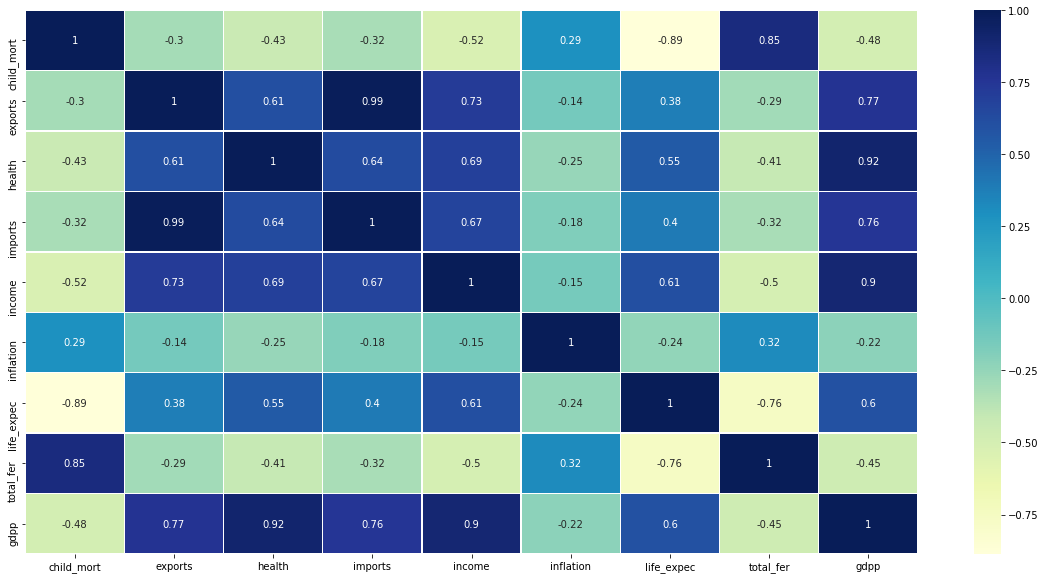

In [15]:
# checking for correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(country_df[["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]].corr(), annot= True, cmap='YlGnBu',linewidths=.5)
plt.show()

### Insights from the correlation plots

1. exports and imports have a high positive correlations.
2. Health and gdpp has high positive correlations.
3. income and gdpp has high positive correlations.
4. life expcetancy and child mort has higher negative correlations.
5. life expcetancy and total_fer has also negative correlations.

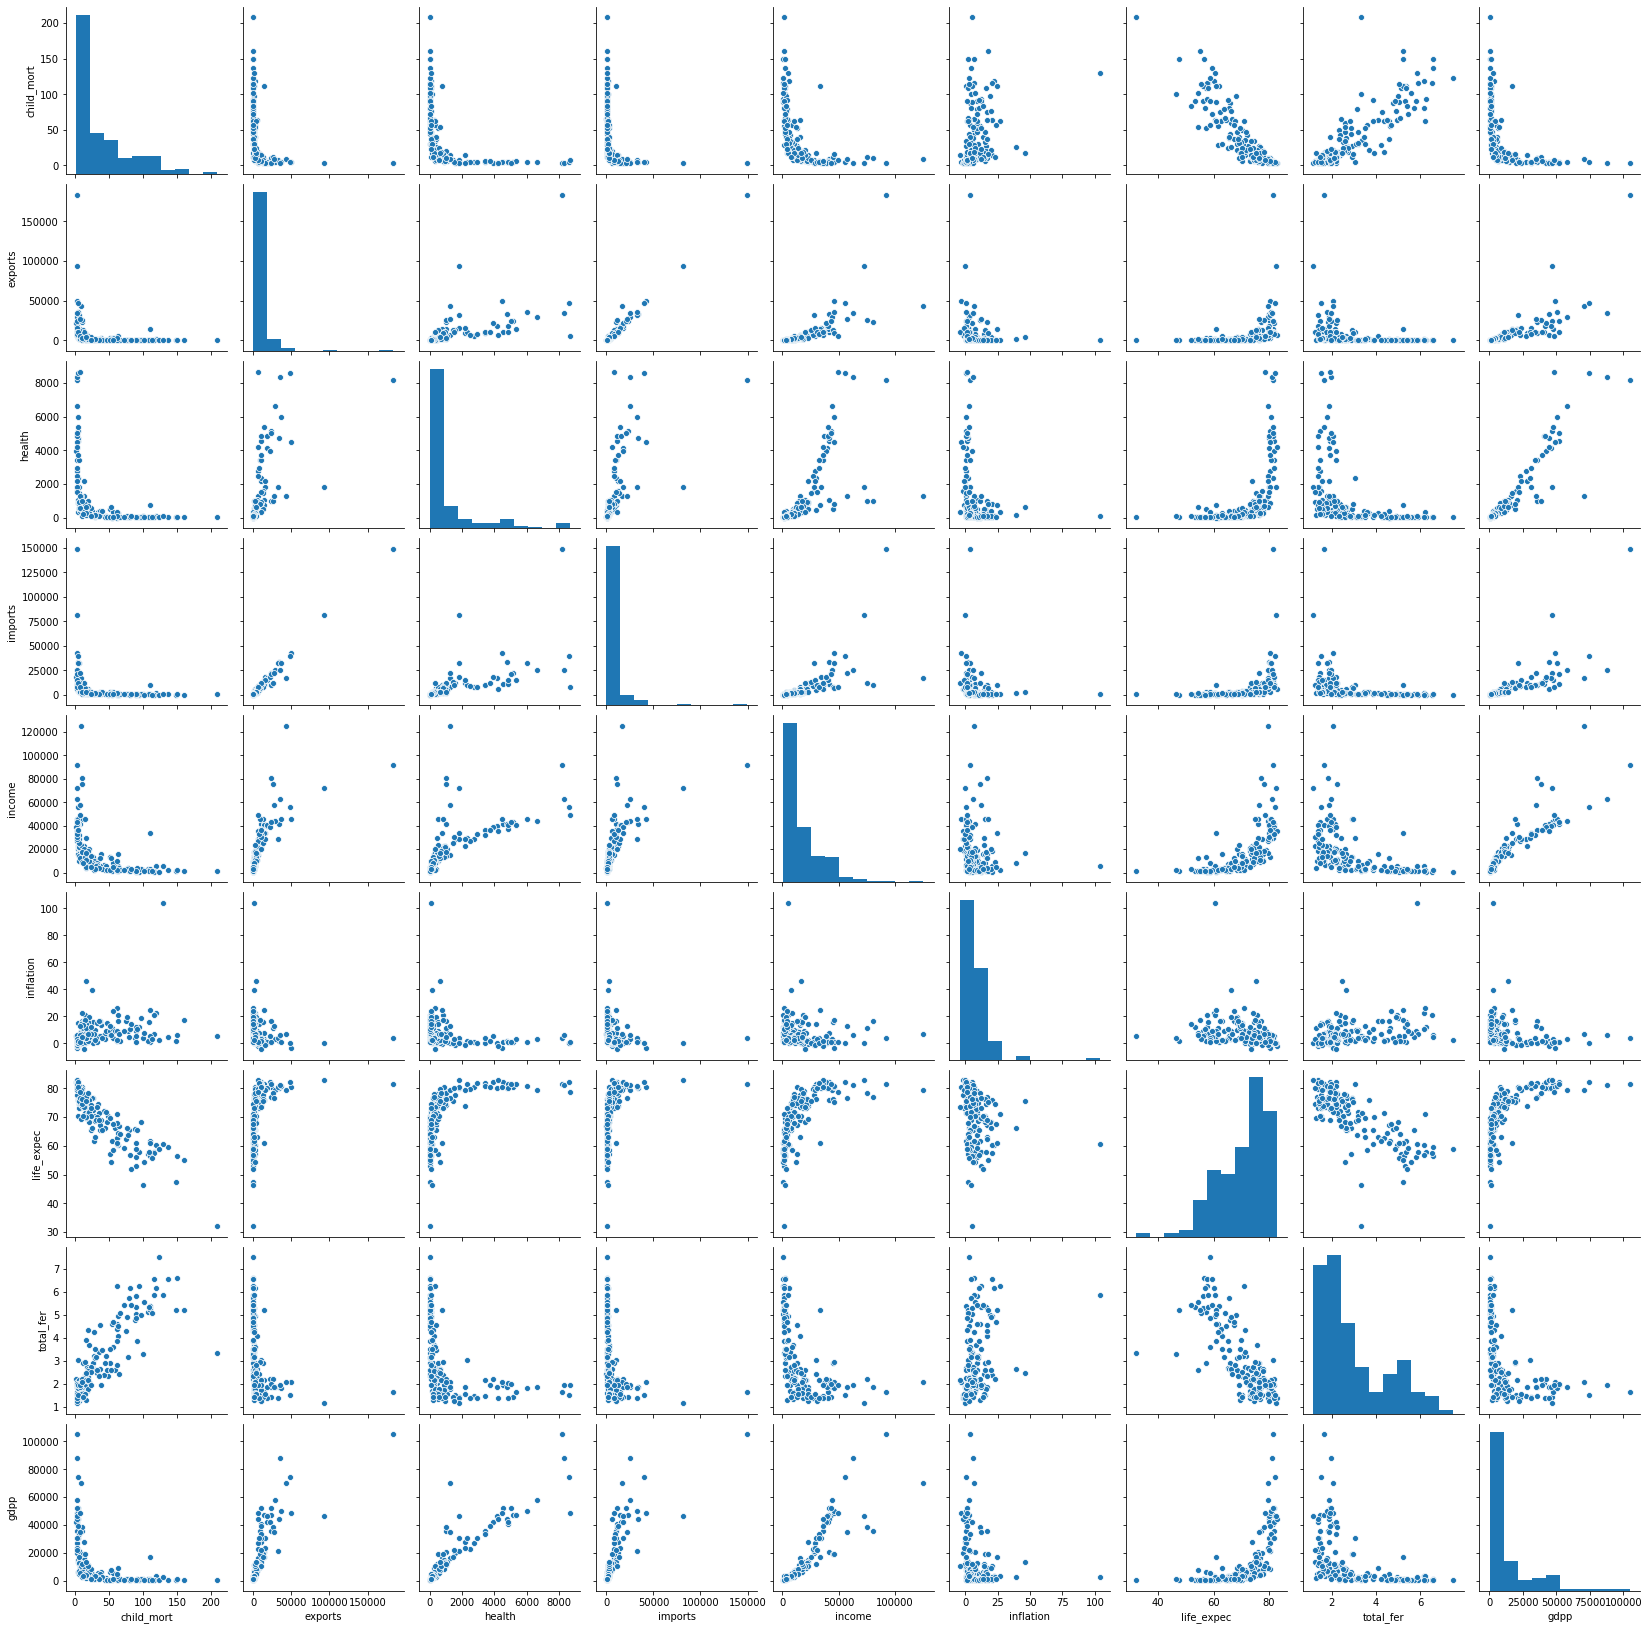

In [16]:
# Data vizulaisation using pairplot.
sns.pairplot(country_df);

insights:
    1. child_mort and total_fer seems to some kind of linear relationship.
    

### Outlier Treatment

In [17]:
# checking the statistic summary part agin before we do any kind of outlier treatment
country_df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


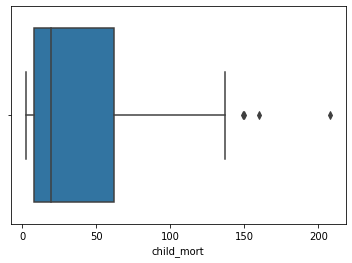

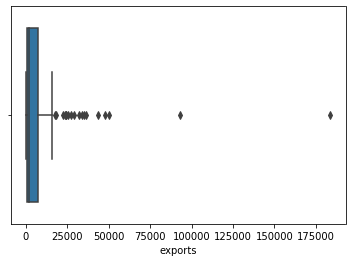

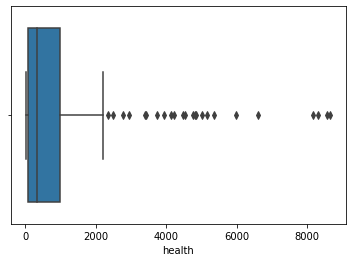

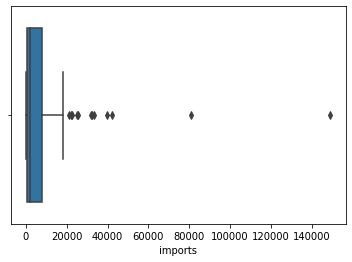

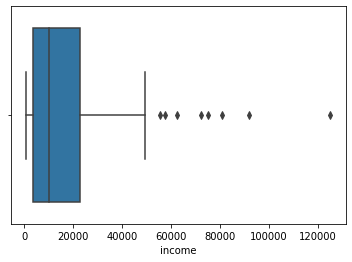

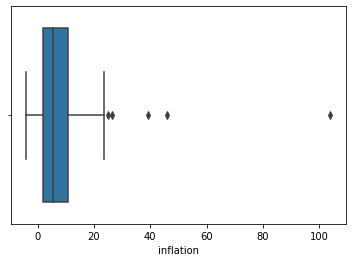

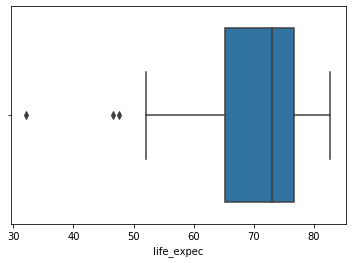

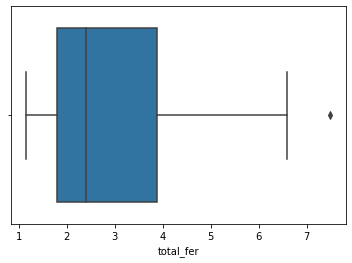

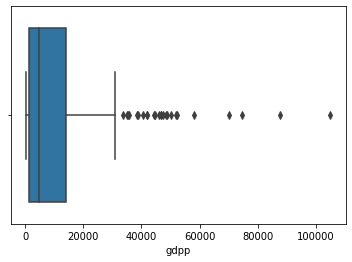

In [18]:
# checking for outliers

for c in column:
    sns.boxplot(country_df[c])
    plt.show();

### insights and Treatment of outliers

1. Thre are outliers present in all the columns above.
2. There is no point in removing outliers for column such as child_mort, health, inflation, life expectancy as this will impact our buisness model which could mean we will end up not giving the financial aid to those countries which are dire need.
3. we can also proceed with the analysis without removing the outliers but it can impact our analysis with change in centroids (kmeans value).
4. but we will proceed with our analysis by removing outliers from gdpp so that caping out the higher income countries will not impact our analysis and the buisness model.

In [19]:
### Outlier treatment: soft capping of gdpp column upto 99%

gdpp_cap_99= country_df['gdpp'].quantile(0.99)
print(gdpp_cap_99)

79088.00000000004


In [20]:
# soft capping  to 99%
country_df['gdpp'][country_df['gdpp']>=gdpp_cap_99]=gdpp_cap_99 

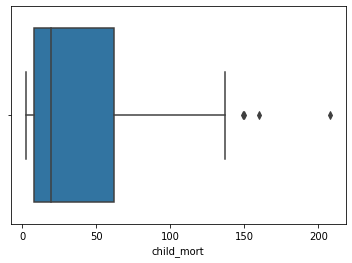

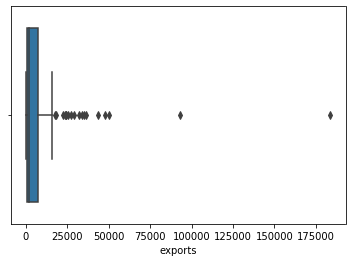

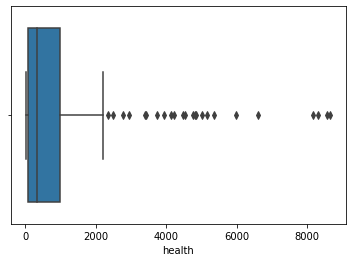

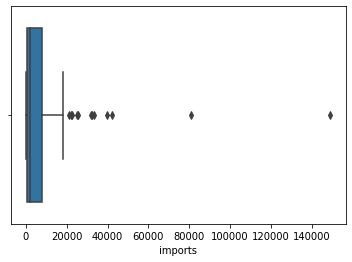

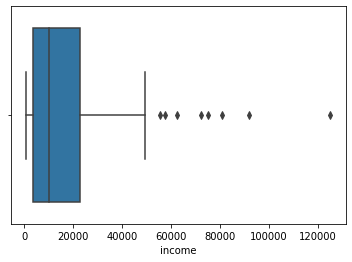

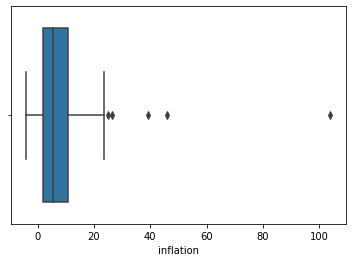

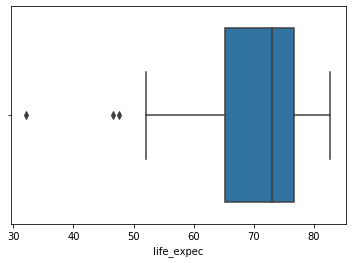

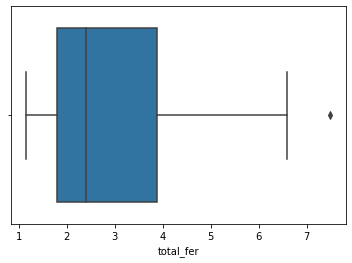

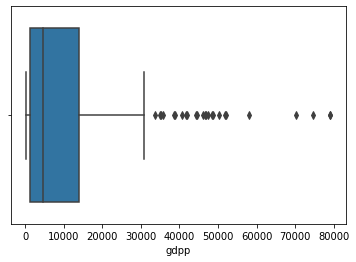

In [21]:
# checking for outliers after soft capping gdpp

for c in column:
    sns.boxplot(country_df[c])
    plt.show();

### insights:

    1. so we can see the gdpp is capped to 99% of the data which means few high value outliers are removed which will not impact our analysis and it wont affect our buisness model wherein we need to identify and fund for the countries which are in dire need.

In [22]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12756.826347
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,79088.000000


In [23]:
country_df.shape

(167, 10)

### Scaling the Data

In [24]:
country_df_scale= country_df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
country_df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 11.9 KB


In [25]:
country_df_scale.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12756.826347
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,79088.000000


In [26]:
#Rescaling

scaler = StandardScaler()
country_df_scaled= scaler.fit_transform(country_df_scale)
country_df_scaled.shape

(167, 9)

In [27]:
country_df_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [28]:
# converting it into a dataframe

country_df_scaled= pd.DataFrame(country_df_scaled)
country_df_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()                           

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.032042


## Hopkins Statistics

1. To check if the given data will have some meaningful clusters.
2. To check if the given data is not random.
3. To check also know as cluster Tendency.


In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_df_scaled)

0.9278496662667453

### Insights:

we can understand that our data is 92.73% different from randomly scattered data.


Less than 50 - Useless

50-65 - Can Consider

65-84 - Good

85 and Above - Green signal

### Find the best value of k : Silhoutte score and SSD elbow



In [31]:
# compute Silhoutte Score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(country_df_scaled)
    ss.append( [k, silhouette_score(country_df_scaled, kmean.labels_)] )

In [32]:
# check silhoutte score
ss

[[2, 0.4613383788311627],
 [3, 0.42274264693299934],
 [4, 0.4304912123830022],
 [5, 0.4336465225244309],
 [6, 0.3942646212898693],
 [7, 0.39195591510373523],
 [8, 0.3053905432083163],
 [9, 0.3095725697870901],
 [10, 0.30038715169934394]]

In [33]:
# converting the silhoutte score into a data frame
silhoutte_score= pd.DataFrame(ss)
silhoutte_score

,0,1
0,2,0.461338
1,3,0.422743
2,4,0.430491
3,5,0.433647
4,6,0.394265
5,7,0.391956
6,8,0.305391
7,9,0.309573
8,10,0.300387


In [34]:
# compute the k and corresponding silhoutte score.
silhoutte_score.columns=['k','silhoutte score']

In [35]:
# check the k and corresponding silhoutte score.
silhoutte_score

,k,silhoutte score
0,2,0.461338
1,3,0.422743
2,4,0.430491
3,5,0.433647
4,6,0.394265
5,7,0.391956
6,8,0.305391
7,9,0.309573
8,10,0.300387


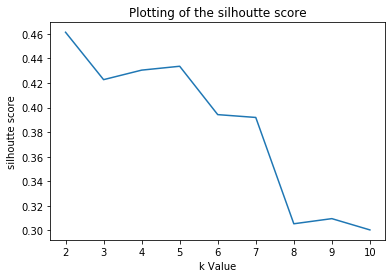

In [36]:
# plotting of the silhouttescore and k 
plt.plot(silhoutte_score['k'], silhoutte_score['silhoutte score'])
plt.xlabel("k Value")
plt.ylabel("silhoutte score")
plt.title("Plotting of the silhoutte score")
plt.show();

In [37]:
# compute SSD elbow curve

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(country_df_scaled)
    ssd.append( [k, kmean.inertia_] )

In [38]:
# check ssd value
ssd

[[2, 936.0240660961977],
 [3, 645.7943652549889],
 [4, 477.14210891596673],
 [5, 398.06868911917934],
 [6, 347.4591908338024],
 [7, 303.95741754485846],
 [8, 271.04649062294266],
 [9, 246.94925179573494],
 [10, 216.54572881187022]]

In [39]:
# converting ssd value into dataframe
ssd= pd.DataFrame(ssd)
ssd

,0,1
0,2,936.024066
1,3,645.794365
2,4,477.142109
3,5,398.068689
4,6,347.459191
5,7,303.957418
6,8,271.046491
7,9,246.949252
8,10,216.545729


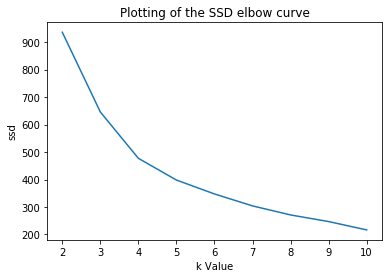

In [40]:
# plotting ssd value vs k
plt.xlabel("k Value")
plt.ylabel("ssd")
plt.title("Plotting of the SSD elbow curve")
plt.plot(ssd[0],ssd[1])

### insights:

    1.From the above analysis (silhouette score and SSD Elbow Curve), we could see that 3,4 or 5 clusters are optimal number of clusters to be used. 
    2.We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.

## Modelling by Kmeans

In [41]:
# K means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [42]:
# Centroid value for the final clusters

print(kmeans_3.cluster_centers_)

[[ 1.32661038 -0.36504233 -0.52444743 -0.39281661 -0.68923797  0.39181237
  -1.27627565  1.3543418  -0.62421756]
 [-0.44550624 -0.21297273 -0.28365905 -0.1962204  -0.16527697 -0.0674905
   0.32760944 -0.47234163 -0.27488374]
 [-0.82629395  1.31794823  1.82094465  1.3111162   1.71870094 -0.45233422
   1.12317044 -0.78661849  1.96345939]]


In [43]:
# k means lable 
kmeans_3.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [44]:
# checking the dataframe
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0


In [45]:
country_df['cluster_label_3']= kmeans_3.labels_

In [46]:
# checking the dataframe with cluster label assigned
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


In [47]:
# checking the number of countries in each cluster
country_df['cluster_label_3'].value_counts()

1    91
0    48
2    28
Name: cluster_label_3, dtype: int64

### visulaization of kmeans clustering using scatter plot

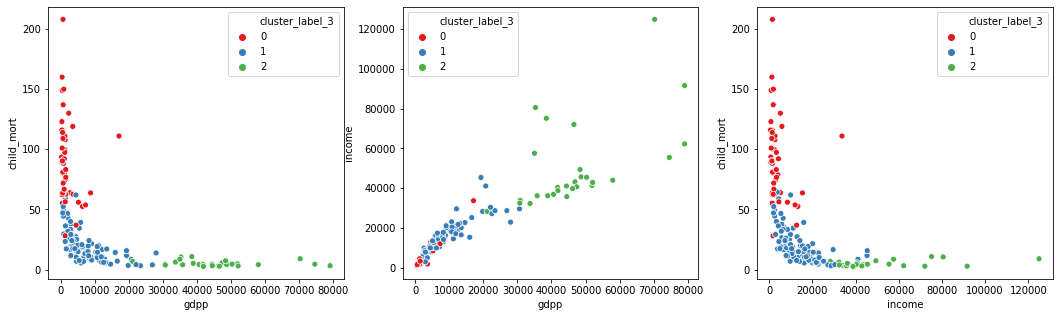

In [48]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_label_3', data=country_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income',hue='cluster_label_3', data=country_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort',hue='cluster_label_3', data=country_df, palette='Set1')
plt.show()

### insights: Cluster 3

1. child_mort seems to be high for lower value of gdpp
2. gdpp increases as income increases.
3. child_mort is high for low income.

### cluster profiling : gdpp,income,child_mort

In [49]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


In [50]:
country_df[['gdpp','income','child_mort','cluster_label_3']].groupby('cluster_label_3').mean()

,gdpp,income,child_mort
cluster_label_3,,,
0,1909.208333,3897.354167,91.610417
1,7979.912088,13968.021978,20.357143
2,46877.714286,50178.571429,5.046429


<Figure size 1296x360 with 0 Axes>

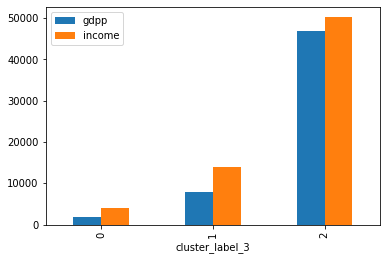

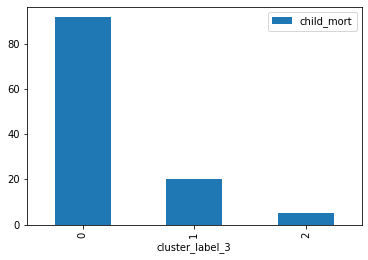

In [51]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_label_3']].groupby('cluster_label_3').mean().plot(kind='bar');
country_df[['child_mort','cluster_label_3']].groupby('cluster_label_3').mean().plot(kind='bar');
plt.show()

### insights: Cluster 3

1. cluster 0: seems to high child_mort compared to other clusters.
2. cluster 0 : gdpp and income also is lower compared to other clusters.
3. Hence cluster 0 is recommended for the financial aid from the HELP international NGO.
    

In [52]:
country_dire_need_3= country_df[country_df['cluster_label_3']==0]

In [53]:
country_dire_need_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769.0,0


In [54]:
country_dire_need_3.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399.0,0


### Second iteration of K means : 4 cluster

In [55]:
# K means with 3 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [56]:
# Centroid value for the final clusters

print(kmeans_4.cluster_centers_)

[[-0.43155282 -0.22621889 -0.31950613 -0.21319838 -0.19193913 -0.04618906
   0.30079929 -0.46763474 -0.3121307 ]
 [ 1.32661038 -0.36504233 -0.52444743 -0.39281661 -0.68923797  0.39181237
  -1.27627565  1.3543418  -0.62421756]
 [-0.8253904   0.78629938  1.68609375  0.78692193  1.49089076 -0.46912792
   1.11066975 -0.75145085  1.78156867]
 [-0.88216414  7.31330621  2.19664845  7.39795921  3.36911695 -0.56882323
   1.29073525 -1.03223716  2.88222662]]


In [57]:
# using 4 clusters
kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [58]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


In [59]:
# assigning cluster 4 lable to dataframe
country_df['cluster_label_4']= kmeans_4.labels_

In [60]:
# checking the head
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0


In [61]:
# checking the grouping of countries in diffrent clusters.
country_df['cluster_label_4'].value_counts()

0    88
1    48
2    29
3     2
Name: cluster_label_4, dtype: int64

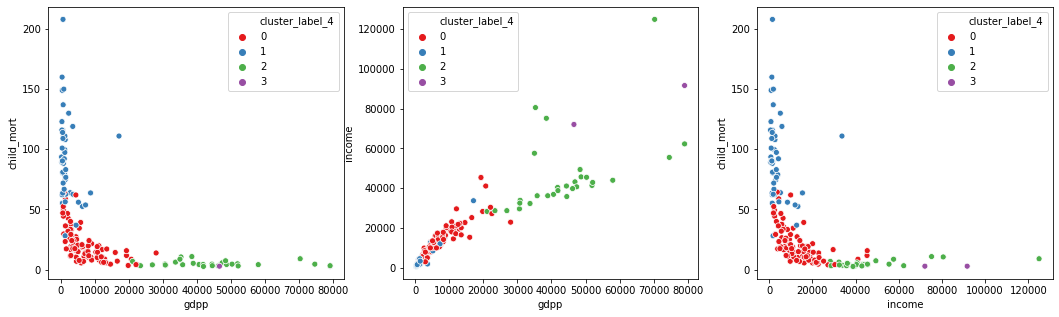

In [62]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_label_4', data=country_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income',hue='cluster_label_4', data=country_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort',hue='cluster_label_4', data=country_df, palette='Set1')
plt.show()

### insights: 4 clusters

1. child_mort is high for lower value of gdpp.
2. income is low for lower values of gdpp.
3. child_mort is high for lower value of income.

In [63]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0


In [64]:
country_df[['gdpp','income','child_mort','cluster_label_4']].groupby('cluster_label_4').mean()

,gdpp,income,child_mort
cluster_label_4,,,
0,7332.636364,13455.568182,20.918182
1,1909.208333,3897.354167,91.610417
2,43716.827586,45800.000000,5.082759
3,62844.000000,81900.000000,2.800000


<Figure size 1296x360 with 0 Axes>

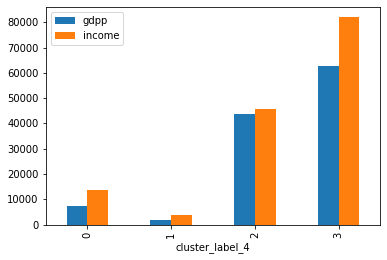

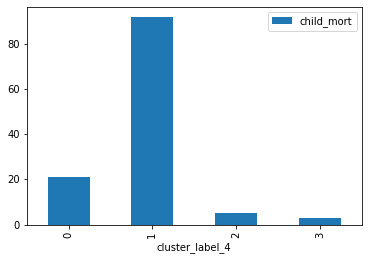

In [65]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_label_4']].groupby('cluster_label_4').mean().plot(kind='bar');
country_df[['child_mort','cluster_label_4']].groupby('cluster_label_4').mean().plot(kind='bar');
plt.show()

### insights: 4 clusters

1. cluster 1 : has high child_mort compared to other clusters.
2. cluster 1: has low income and low gdpp compared to other clusters.
3. clusters with kmean=4 doesnt provide a balanced clusters as comapred to clusters with kmean = 3.

In [66]:
country_dire_need_4= country_df[country_df['cluster_label_4']==0]

In [67]:
country_dire_need_4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0
10,Bahamas,13.8,9800.00000,2209.2000,12236.000000,22900,-0.393,73.8,1.86,28000.0,1,0
11,Bahrain,8.6,14386.50000,1028.7900,10536.300000,41100,7.440,76.0,2.16,20700.0,1,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758.0,1,0
13,Barbados,14.2,6320.00000,1275.2000,7792.000000,15300,0.321,76.7,1.78,16000.0,1,0


In [68]:
country_dire_need_4.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592.0,1,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738.0,1,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758.0,1,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.12,66.1,2.88,786.0,1,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.00,68.5,3.10,880.0,1,0


In [69]:
country_dire_need_4= country_df[country_df['cluster_label_4']==1]

In [70]:
country_dire_need_4

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553.0,0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530.0,0,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758.0,0,1
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350.0,0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575.0,0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231.0,0,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310.0,0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446.0,0,1
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897.0,0,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769.0,0,1


In [71]:
country_dire_need_4.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231.0,0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327.0,0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334.0,0,1
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348.0,0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399.0,0,1


### Third iteration kmeans : 5 clusters

In [72]:
# K means with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [73]:
# Centroid value for the final clusters

print(kmeans_5.cluster_centers_)

[[-0.42668784 -0.22837453 -0.33225537 -0.21708047 -0.20015868 -0.03893408
   0.29227273 -0.46114506 -0.32216282]
 [ 1.30629603 -0.36469852 -0.52448663 -0.39220499 -0.69062463  0.20589948
  -1.27930022  1.34238878 -0.62473275]
 [-0.88216414  7.31330621  2.19664845  7.39795921  3.36911695 -0.56882323
   1.29073525 -1.03223716  2.88222662]
 [-0.82637093  0.75880011  1.65621321  0.76484267  1.45863313 -0.4760694
   1.10840111 -0.76081039  1.74087182]
 [ 2.28138502 -0.38120158 -0.52260487 -0.4215626  -0.62406477  9.12971806
  -1.13412081  1.91613337 -0.60000344]]


In [74]:
# kmeans with 5 clusters.
kmeans_5.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [75]:
# checking the head
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0


In [76]:
# assigning the cluster lable 5 to dataframe.
country_df['cluster_label_5']= kmeans_5.labels_

In [77]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0


In [78]:
# checking the number of countries clustered in each group.
country_df['cluster_label_5'].value_counts()

0    87
1    47
3    30
2     2
4     1
Name: cluster_label_5, dtype: int64

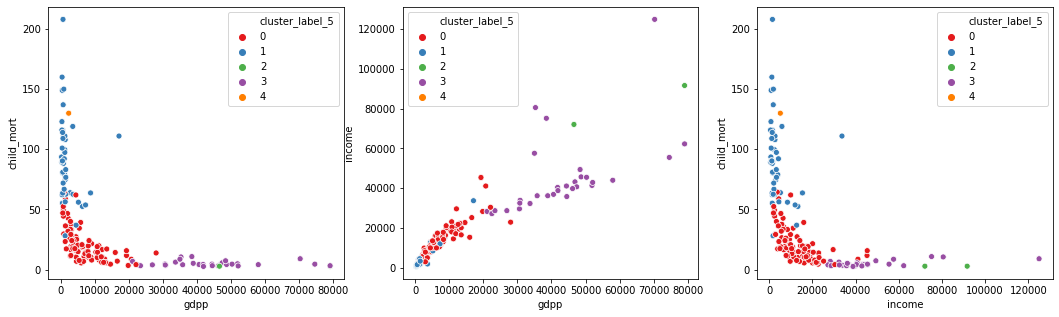

In [79]:
# checking the distribution of data with respect to 5 clusters.
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_label_5', data=country_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income',hue='cluster_label_5', data=country_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort',hue='cluster_label_5', data=country_df, palette='Set1')
plt.show()

### insights: 5 Clusters

1. child_mort is high for low value of gdpp.
2. income seems to be low for lower value of gdpp.
3. child_mort is high for lower income.

In [80]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0


In [81]:
country_df[['gdpp','income','child_mort','cluster_label_5']].groupby('cluster_label_5').mean()

,gdpp,income,child_mort
cluster_label_5,,,
0,7158.298851,13297.586207,21.113793
1,1900.255319,3870.702128,90.793617
2,62844.000000,81900.000000,2.800000
3,43009.600000,45180.000000,5.043333
4,2330.000000,5150.000000,130.000000


<Figure size 1296x360 with 0 Axes>

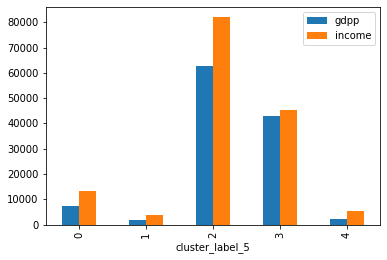

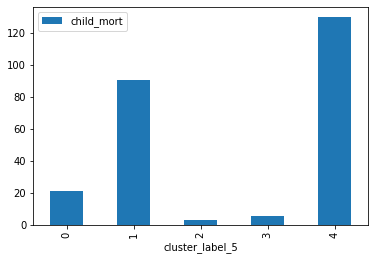

In [82]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_label_5']].groupby('cluster_label_5').mean().plot(kind='bar');
country_df[['child_mort','cluster_label_5']].groupby('cluster_label_5').mean().plot(kind='bar');
plt.show()

### insights: cluster 5

1. cluster 4: have high child_mort compared to other clusters.
2. cluster 1: have the low gdpp and low income.
3. cluster with k=5 doesnt give a balanced cluster as compared to cluster with k=3.

In [83]:
country_dire_need_5= country_df[country_df['cluster_label_5']==0]

In [84]:
country_dire_need_5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0,0
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0,0
10,Bahamas,13.8,9800.00000,2209.2000,12236.000000,22900,-0.393,73.8,1.86,28000.0,1,0,0
11,Bahrain,8.6,14386.50000,1028.7900,10536.300000,41100,7.440,76.0,2.16,20700.0,1,0,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758.0,1,0,0
13,Barbados,14.2,6320.00000,1275.2000,7792.000000,15300,0.321,76.7,1.78,16000.0,1,0,0


In [85]:
country_dire_need_5.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592.0,1,0,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738.0,1,0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758.0,1,0,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.12,66.1,2.88,786.0,1,0,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.00,68.5,3.10,880.0,1,0,0


In [86]:
country_dire_need_5= country_df[country_df['cluster_label_5']==1]

In [87]:
country_dire_need_5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553.0,0,1,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530.0,0,1,1
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758.0,0,1,1
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350.0,0,1,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575.0,0,1,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231.0,0,1,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310.0,0,1,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446.0,0,1,1
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897.0,0,1,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769.0,0,1,1


In [88]:
country_dire_need_5.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231.0,0,1,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327.0,0,1,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334.0,0,1,1
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348.0,0,1,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399.0,0,1,1


In [89]:
country_dire_need_5= country_df[country_df['cluster_label_5']==4]

In [90]:
country_dire_need_5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330.0,0,1,4


In [91]:
country_dire_need_5.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330.0,0,1,4


### Hierarchial Clustering: Single linkage, Complete linkage, Visualization

In [92]:
# checking the dataframe ahead of hierarchial clustering.
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.032042


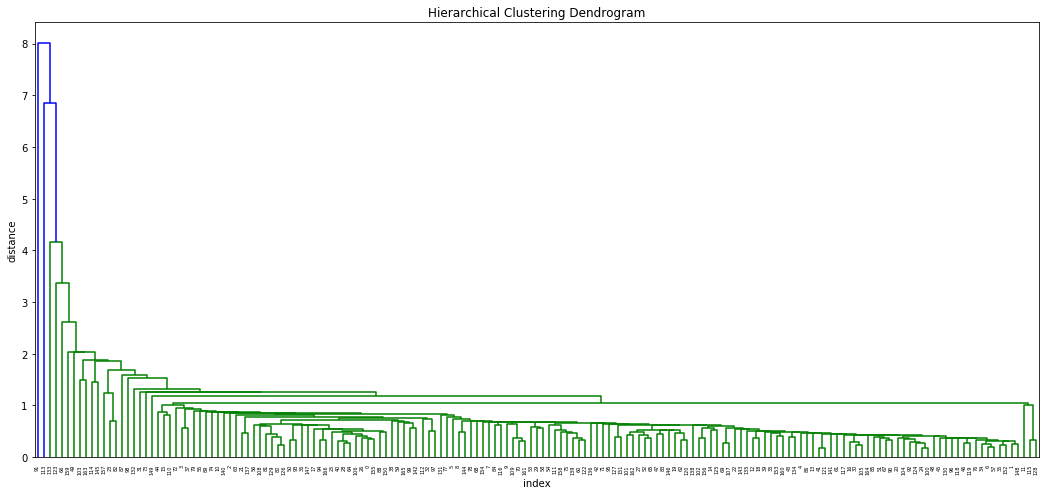

In [93]:
# single linkage.
plt.figure(figsize=(18,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

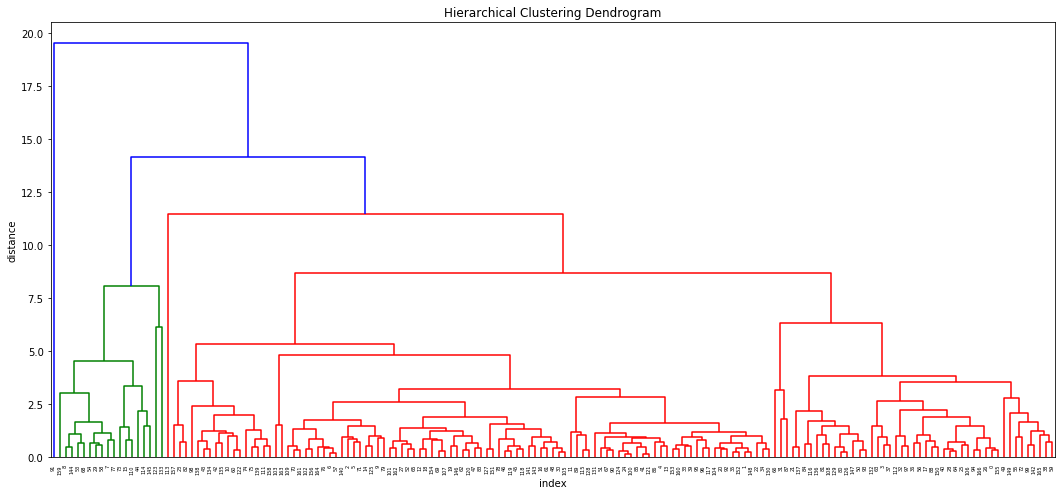

In [94]:
# complete linkage
plt.figure(figsize=(18,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### First clustering iteration : 3 clusters

In [95]:
# 3 clusters
cluster_id_3 = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_id_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [96]:
# assigning cluster idto the data frame.
country_df['cluster_id_3'] = cluster_id_3
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0,0


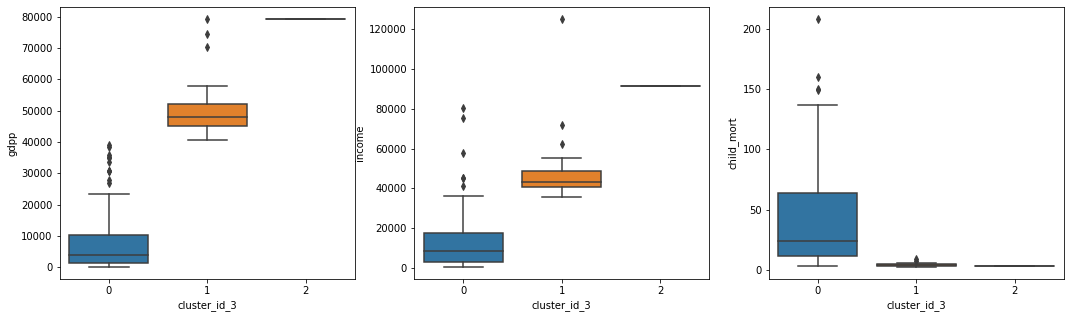

In [97]:
# checking for outliers with respect to cluster id 3.
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id_3', y='gdpp', data=country_df);
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id_3', y='income', data=country_df);
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id_3', y='child_mort', data=country_df);
plt.show()

### insights: Cluster 3
    1. outliers identified for gdpp for cluster 0 and 1.
    2. outliers identified for income for cluster 0 and 1.
    3.outliers identified for child_mort for cluster 0 and 1
    4. no data points are grouped in cluster 2.

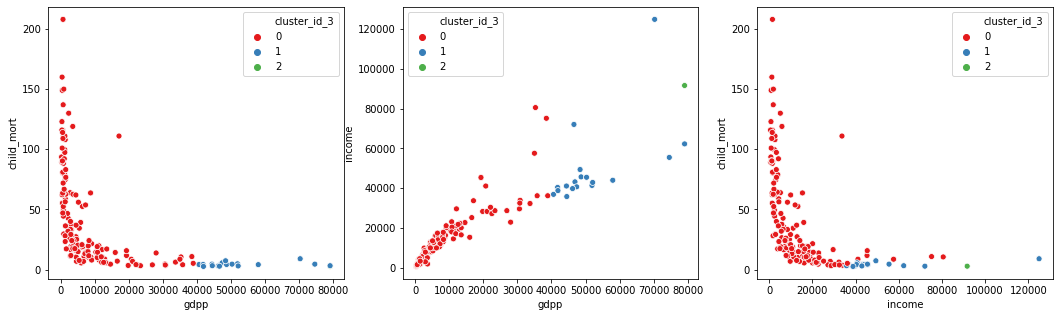

In [98]:
# comparing  gdpp vs child_mort, gdpp vs income, income vs child_mort
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_id_3', data=country_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income',hue='cluster_id_3', data=country_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort',hue='cluster_id_3', data=country_df, palette='Set1')
plt.show()

### insights: cluster 3

1. child_mort is high when gdpp is low.
2. income seems to be low when gdpp is also low.
3. child_mort is high when income is low.

In [99]:
# checking the number of countries assigned to each clusters.
country_df['cluster_id_3'].value_counts()

0    148
1     18
2      1
Name: cluster_id_3, dtype: int64

### Hierarchial Clustering profiling : gdpp, income, child_mort: 3 clusters

In [100]:
# checking the head
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0,0


In [101]:
# performing cluster profiling with respect to gdpp, income and child_mort.
country_df[['gdpp','income','child_mort','cluster_id_3']].groupby('cluster_id_3').mean()

,gdpp,income,child_mort
cluster_id_3,,,
0,7551.445946,12641.641892,42.630405
1,51871.555556,50027.777778,4.388889
2,79088.000000,91700.000000,2.800000


<Figure size 1296x360 with 0 Axes>

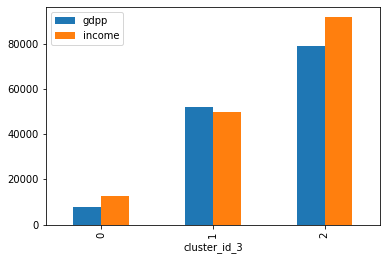

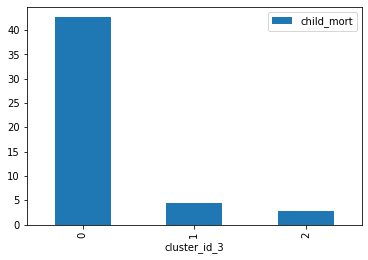

In [102]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_id_3']].groupby('cluster_id_3').mean().plot(kind='bar');
country_df[['child_mort','cluster_id_3']].groupby('cluster_id_3').mean().plot(kind='bar');
plt.show()

### insights: cluster 3

1. child_mort is high for cluster 0
2. income and gdpp is low for cluster 0
3. segementation of clusters clear identifies cluster0: under developed countries, cluster 1: developing countries, cluster 2: developed countries. 

In [103]:
# checking under developed countries 
country_dire_need_3_H= country_df[country_df['cluster_id_3']==0]

In [104]:
country_dire_need_3_H

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553.0,0,1,1,0
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0,0,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0,0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530.0,0,1,1,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0,0,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0,0,0
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0,0,0
10,Bahamas,13.8,9800.00000,2209.2000,12236.000000,22900,-0.393,73.8,1.86,28000.0,1,0,0,0
11,Bahrain,8.6,14386.50000,1028.7900,10536.300000,41100,7.440,76.0,2.16,20700.0,1,0,0,0


In [105]:
# identifying under developed countries.
country_dire_need_3_H.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231.0,0,1,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327.0,0,1,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334.0,0,1,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348.0,0,1,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399.0,0,1,1,0


### Second cluster iteration: 4 clusters

In [106]:
# computing with 4 clusters.
cluster_id_4 = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_id_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [107]:
# assinging cluster labels to dataframe
country_df['cluster_id_4'] = cluster_id_4
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0,0,0


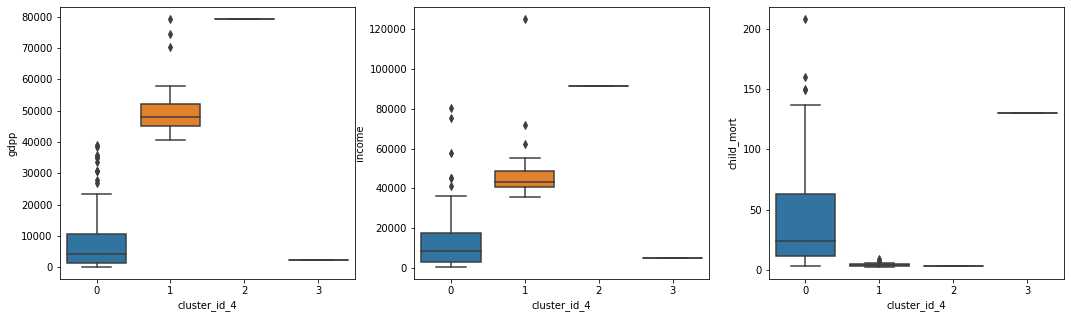

In [108]:
# checking the outliers for cluster id 4
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id_4', y='gdpp', data=country_df);
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id_4', y='income', data=country_df);
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id_4', y='child_mort', data=country_df);
plt.show()

### insights: 4 cluster 
1. outliers identified for gdpp for cluster 0 and 1.
2. outliers identified for income for cluster 0 and 1.
3.outliers identified for child_mort for cluster 0 and 1
4. no data points are grouped in cluster 2 and 3

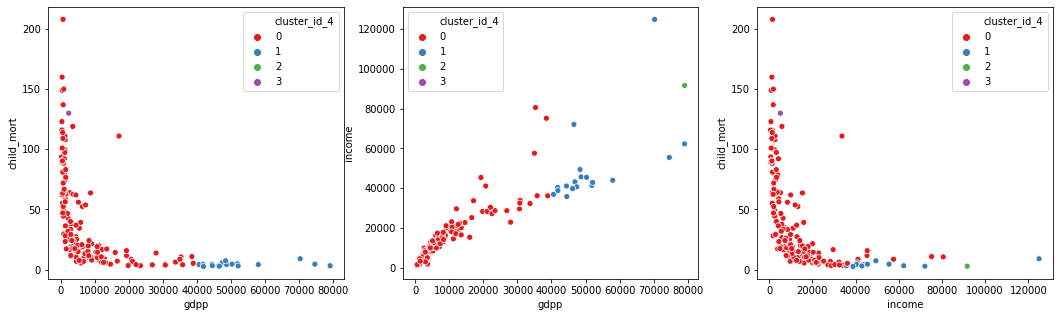

In [109]:
# comparing  gdpp vs child_mort, gdpp vs income, income vs child_mort
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_id_4', data=country_df, palette='Set1');
plt.subplot(1,3,2)
sns.scatterplot(x='gdpp', y='income',hue='cluster_id_4', data=country_df, palette='Set1');
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='child_mort',hue='cluster_id_4', data=country_df, palette='Set1')
plt.show()

### insights: cluster 4

1. child_mort is high when gdpp is low.
2. income seems to be low when gdpp is also low.
3. child_mort is high when income is low.

In [110]:
# checking the grouping of countries into different clusters.
country_df['cluster_id_4'].value_counts()

0    147
1     18
3      1
2      1
Name: cluster_id_4, dtype: int64

### Hierarchial Clustering profiling : gdpp, income, child_mort: 4 clusters

In [111]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,1,1,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,1,1,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1,0,0,0,0


In [112]:
country_df[['gdpp','income','child_mort','cluster_id_4']].groupby('cluster_id_4').mean()

,gdpp,income,child_mort
cluster_id_4,,,
0,7586.965986,12692.605442,42.036054
1,51871.555556,50027.777778,4.388889
2,79088.000000,91700.000000,2.800000
3,2330.000000,5150.000000,130.000000


<Figure size 1296x360 with 0 Axes>

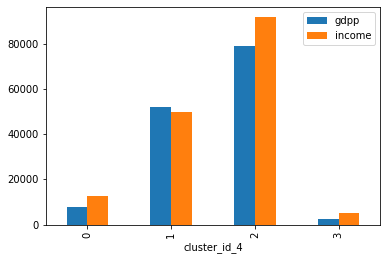

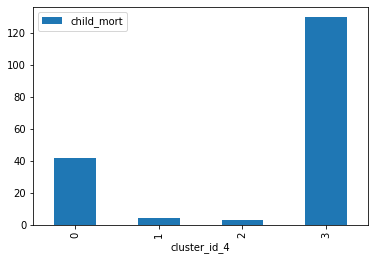

In [113]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_id_4']].groupby('cluster_id_4').mean().plot(kind='bar');
country_df[['child_mort','cluster_id_4']].groupby('cluster_id_4').mean().plot(kind='bar');
plt.show()

### insights: 4 clusters.

1. child_mort is high for cluster 0
2. income and gdpp is also low for cluster 0
3. But if we observe carefully cluster 3 has only one country nigeria with high child mort but gets grouped into another group.

In [114]:
country_dire_need_4_H= country_df[country_df['cluster_id_4']==0]

In [115]:
country_dire_need_4_H

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553.0,0,1,1,0,0
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530.0,0,1,1,0,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0,0,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0,0,0,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0,0,0,0
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0,0,0,0
10,Bahamas,13.8,9800.00000,2209.2000,12236.000000,22900,-0.393,73.8,1.86,28000.0,1,0,0,0,0
11,Bahrain,8.6,14386.50000,1028.7900,10536.300000,41100,7.440,76.0,2.16,20700.0,1,0,0,0,0


In [116]:
country_dire_need_4_H.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231.0,0,1,1,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327.0,0,1,1,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334.0,0,1,1,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348.0,0,1,1,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399.0,0,1,1,0,0


In [117]:
country_dire_need_4_H= country_df[country_df['cluster_id_4']==3]

In [118]:
country_dire_need_4_H

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330.0,0,1,4,0,3


In [119]:
country_dire_need_4_H.sort_values(by=['gdpp','income','child_mort'], ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330.0,0,1,4,0,3


### Hierarchial clustering final insights:

1. Cluster 3 is the ideal cluster
2. cluster 4 shows nigeria in a different group 
3. nigeria could be a country where it could miss out on aid because it gets clustered into a different group.
4. Hence we will go with Cluster 3 for Hierarchial clustering.

### Explanation of clusters using Hierarchial model.

In [120]:
# New DF for group by and analysis

country_df_H_results= country_df.copy()
country_df_H_results

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553.0,0,1,1,0,0
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530.0,0,1,1,0,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0,0,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0,0,0,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0,0,0,0
7,Australia,4.8,10276.20000,4530.8700,10847.100000,41400,1.160,82.0,1.93,51900.0,2,2,3,1,1
8,Austria,4.3,24059.70000,5159.0000,22418.200000,43200,0.873,80.5,1.44,46900.0,2,2,3,1,1
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0,0,0,0


In [121]:
# checking only with respect to cluster id 3 
country_df_H_results.drop(['cluster_label_3','cluster_label_4','cluster_label_5'], axis=1, inplace=True)
country_df_H_results.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,0,0


In [122]:
country_df_H_results =country_df_H_results.groupby(['cluster_id_3']).mean()
country_df_H_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_4
cluster_id_3,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,51871.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,79088.000000,2.00000


In [123]:
country_df_H_results['count']=country_df[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
country_df_H_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_4,count
cluster_id_3,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,51871.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,79088.000000,2.00000,1


In [124]:
country_df_H_results['percentage']= round(country_df_H_results['count']/country_df_H_results['count'].sum(),2)
country_df_H_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_4,count,percentage
cluster_id_3,,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,51871.555556,1.00000,18,0.11
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,79088.000000,2.00000,1,0.01


<Figure size 1296x360 with 0 Axes>

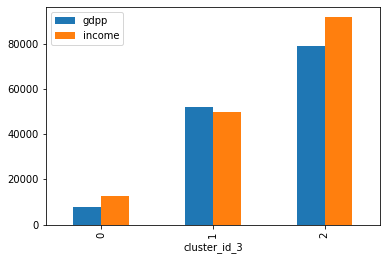

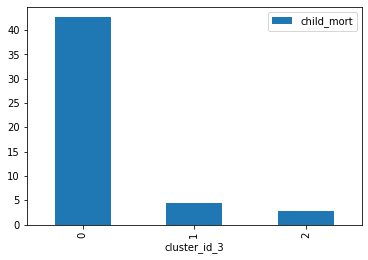

In [125]:
plt.figure(figsize=(18,5))
country_df[['gdpp','income','cluster_id_3']].groupby('cluster_id_3').mean().plot(kind='bar');
country_df[['child_mort','cluster_id_3']].groupby('cluster_id_3').mean().plot(kind='bar');
plt.show()

### Key Final insights: Hierarchial clustering
    
    1. child_mort is higher cluster 0 compared to other clusters.
    2. income and gdpp is low for cluster 0 comapred to other clusters.
    3. but there is a huge data imbalnce since cluster 0 has 89% of data 0bservations compared to other clusters.
    4. In buisness terms it wont make sense to have most of the observations to lie in one cluster and increasing cluster number also didnt help.
    
    Hence we will consider K means clustering as the way to go forward to determine the countries that are in need on financial aid for better segemtation.

### Final Analysis to Identify the countries that need financial aid using K means

In [126]:
country_df_k_results=country_df.copy()
country_df_k_results

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_label_5,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553.0,0,1,1,0,0
1,Albania,16.6,1145.20000,267.8950,1987.740000,9930,4.490,76.3,1.65,4090.0,1,0,0,0,0
2,Algeria,27.3,1712.64000,185.9820,1400.440000,12900,16.100,76.5,2.89,4460.0,1,0,0,0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530.0,0,1,1,0,0
4,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200.0,1,0,0,0,0
5,Argentina,14.5,1946.70000,834.3000,1648.000000,18700,20.900,75.8,2.37,10300.0,1,0,0,0,0
6,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220.0,1,0,0,0,0
7,Australia,4.8,10276.20000,4530.8700,10847.100000,41400,1.160,82.0,1.93,51900.0,2,2,3,1,1
8,Austria,4.3,24059.70000,5159.0000,22418.200000,43200,0.873,80.5,1.44,46900.0,2,2,3,1,1
9,Azerbaijan,39.2,3171.12000,343.3920,1208.880000,16000,13.800,69.1,1.92,5840.0,1,0,0,0,0


In [127]:
country_df_k_results.drop(['cluster_label_4','cluster_label_5','cluster_id_3','cluster_id_4'], axis=1, inplace=True)
country_df_k_results.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,1


In [128]:
country_df_k_results =country_df_k_results.groupby(['cluster_label_3']).mean()
country_df_k_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label_3,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,46877.714286


In [129]:
country_df_k_results['count']=country_df[['cluster_label_3','child_mort']].groupby(['cluster_label_3']).count()
country_df_k_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,count
cluster_label_3,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,91
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,46877.714286,28


In [130]:
country_df_k_results['percentage']= round(country_df_k_results['count']/country_df_k_results['count'].sum(),2)
country_df_k_results

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,count,percentage
cluster_label_3,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48,0.29
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,91,0.54
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,46877.714286,28,0.17


In [131]:
country_df_k_results= country_df_k_results.rename({0: 'Under_Developed_Countries',1:'Developing_Countries',2:'Developed_Counties'}).reset_index()

In [132]:
country_df_k_results[['cluster_label_3','child_mort','income','gdpp','count','percentage']]

,cluster_label_3,child_mort,income,gdpp,count,percentage
0,Under_Developed_Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing_Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed_Counties,5.046429,50178.571429,46877.714286,28,0.17


### Analysis of under developed countries.

In [133]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_label_3', 'cluster_label_4', 'cluster_label_5', 'cluster_id_3', 'cluster_id_4'], dtype='object')

In [134]:
# creating final cluster to analyze under developed countries.
country_df_final=country_df[country_df['cluster_label_3']==0].copy()
country_df_final= country_df_final[['country','child_mort','income','gdpp']]

In [135]:
country_df_final.sort_values(['gdpp','income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231.0
88,Liberia,89.3,700,327.0
37,"Congo, Dem. Rep.",116.0,609,334.0
112,Niger,123.0,814,348.0
132,Sierra Leone,160.0,1220,399.0
93,Madagascar,62.2,1390,413.0
106,Mozambique,101.0,918,419.0
31,Central African Republic,149.0,888,446.0
94,Malawi,90.5,1030,459.0
50,Eritrea,55.2,1420,482.0


In [136]:
country_df_final.describe()

,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


### Insights: Sorting and filtering  the under developed countries

1. we will filter the data as we need low income , low gdpp, high child_mort
2. so we will sort values based on the median as we have some outliers in our data.
3. Then check the countries based on the 3 filtering that is mentioned above.


In [137]:
# Data points less than median for gdpp

Under_Developed_Countries= country_df_final[country_df_final['gdpp']<=932].copy()

Under_Developed_Countries=Under_Developed_Countries.sort_values(['gdpp','income','child_mort'], ascending=[True, True, False])

In [138]:
Under_Developed_Countries[['country','gdpp','income','child_mort']]

,country,gdpp,income,child_mort
26,Burundi,231.0,764,93.6
88,Liberia,327.0,700,89.3
37,"Congo, Dem. Rep.",334.0,609,116.0
112,Niger,348.0,814,123.0
132,Sierra Leone,399.0,1220,160.0
93,Madagascar,413.0,1390,62.2
106,Mozambique,419.0,918,101.0
31,Central African Republic,446.0,888,149.0
94,Malawi,459.0,1030,90.5
50,Eritrea,482.0,1420,55.2


In [139]:
Under_Developed_Countries.shape

(24, 4)

In [140]:
# Data points less than median for income

Under_Developed_Countries= country_df_final[country_df_final['income']<=1860].copy()

Under_Developed_Countries=Under_Developed_Countries.sort_values(['gdpp','income','child_mort'], ascending=[True, True, False])

In [141]:
Under_Developed_Countries[['country','child_mort','gdpp','income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231.0,764
88,Liberia,89.3,327.0,700
37,"Congo, Dem. Rep.",116.0,334.0,609
112,Niger,123.0,348.0,814
132,Sierra Leone,160.0,399.0,1220
93,Madagascar,62.2,413.0,1390
106,Mozambique,101.0,419.0,918
31,Central African Republic,149.0,446.0,888
94,Malawi,90.5,459.0,1030
50,Eritrea,55.2,482.0,1420


In [142]:
Under_Developed_Countries.shape

(24, 4)

In [143]:
# check for child_mort grater than median 
Under_Developed_Countries= Under_Developed_Countries[Under_Developed_Countries['child_mort']>=90]

Under_Developed_Countries=Under_Developed_Countries.sort_values(['gdpp','income','child_mort'], ascending=[True, True, False])

In [144]:
Under_Developed_Countries.shape

(14, 4)

In [145]:
Under_Developed_Countries.describe()

,child_mort,income,gdpp
count,14.00000,14.000000,14.000000
mean,119.40000,1170.928571,490.500000
std,33.00035,352.399350,143.745368
min,90.20000,609.000000,231.000000
25%,95.45000,895.500000,404.000000
50%,112.50000,1200.000000,473.500000
75%,121.25000,1420.000000,569.500000
max,208.00000,1820.000000,758.000000


In [146]:
# Top 10 countries recommended for financial aid from NGO
Under_Developed_Countries.head(10)

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231.0
37,"Congo, Dem. Rep.",116.0,609,334.0
112,Niger,123.0,814,348.0
132,Sierra Leone,160.0,1220,399.0
106,Mozambique,101.0,918,419.0
31,Central African Republic,149.0,888,446.0
94,Malawi,90.5,1030,459.0
150,Togo,90.3,1210,488.0
64,Guinea-Bissau,114.0,1390,547.0
0,Afghanistan,90.2,1610,553.0


### Final Conclusion:

1. performed k means clustring and hierarchial clustering to identify countries that need Financial Aid from HELP international NGO.
2. Based on Hierarchial clustering analysis we concluded that a cluster k=3 gave us better segmentation but due to data imbalance we dropped Hierarchial clustering.
3. Finally we performed k means clustering and found k=3,4,5 as optimal clusters and after final analysis we concluded k=3 gives a better cluster balance and segmentation of countries into different clusters.
4. we identified 10 countries  that are in dire need of financial aid from our final set of analysis.